In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob #used to extract files with some pattern in path

In [7]:
glob.glob(r'S&P_resources.zip/*csv')#*csv means I want all csv type files
#works only with local system and not with zip files

[]

In [26]:
import pandas as pd
import zipfile

# Define selected companies' paths
company_list = [
    'individual_stocks_5yr/AAPL_data.csv',
    'individual_stocks_5yr/AMZN_data.csv',
    'individual_stocks_5yr/MSFT_data.csv',
    'individual_stocks_5yr/GOOGL_data.csv'
]

all_data = pd.DataFrame()

# Open the ZIP file
with zipfile.ZipFile('S&P_resources.zip', 'r') as z:
    # Iterate through each file in the selected company list
    for file in company_list:
        if file in z.namelist():  # Check if the file exists in the ZIP archive
            with z.open(file) as f:
                current_df = pd.read_csv(f)
                all_data = pd.concat([all_data, current_df], ignore_index=True)
        else:
            print(f"File not found in ZIP: {file}")

# Display the concatenated dataframe
print(all_data)




            date       open       high        low      close     volume   Name
0     2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416   AAPL
1     2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425   AAPL
2     2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363   AAPL
3     2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995   AAPL
4     2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154   AAPL
...          ...        ...        ...        ...        ...        ...    ...
5031  2018-02-01  1175.9900  1187.4500  1169.3600  1181.5900    3675709  GOOGL
5032  2018-02-02  1127.4200  1131.3000  1111.1700  1119.2000    5892122  GOOGL
5033  2018-02-05  1100.6100  1114.9900  1056.7400  1062.3900    4177469  GOOGL
5034  2018-02-06  1033.9800  1087.3800  1030.0100  1084.4300    3831524  GOOGL
5035  2018-02-07  1084.9700  1086.5300  1054.6200  1055.4100    2597094  GOOGL

[5036 rows x 7 columns]


In [27]:
len(csv_files)

505

In [28]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [40]:
tech_list=all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'MSFT', 'GOOGL'], dtype=object)

In [30]:
#what was the change in prices of stock over time?

In [33]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [34]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [38]:
all_data['date']=pd.to_datetime(all_data['date'])#to convert date from object to datetime

In [39]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

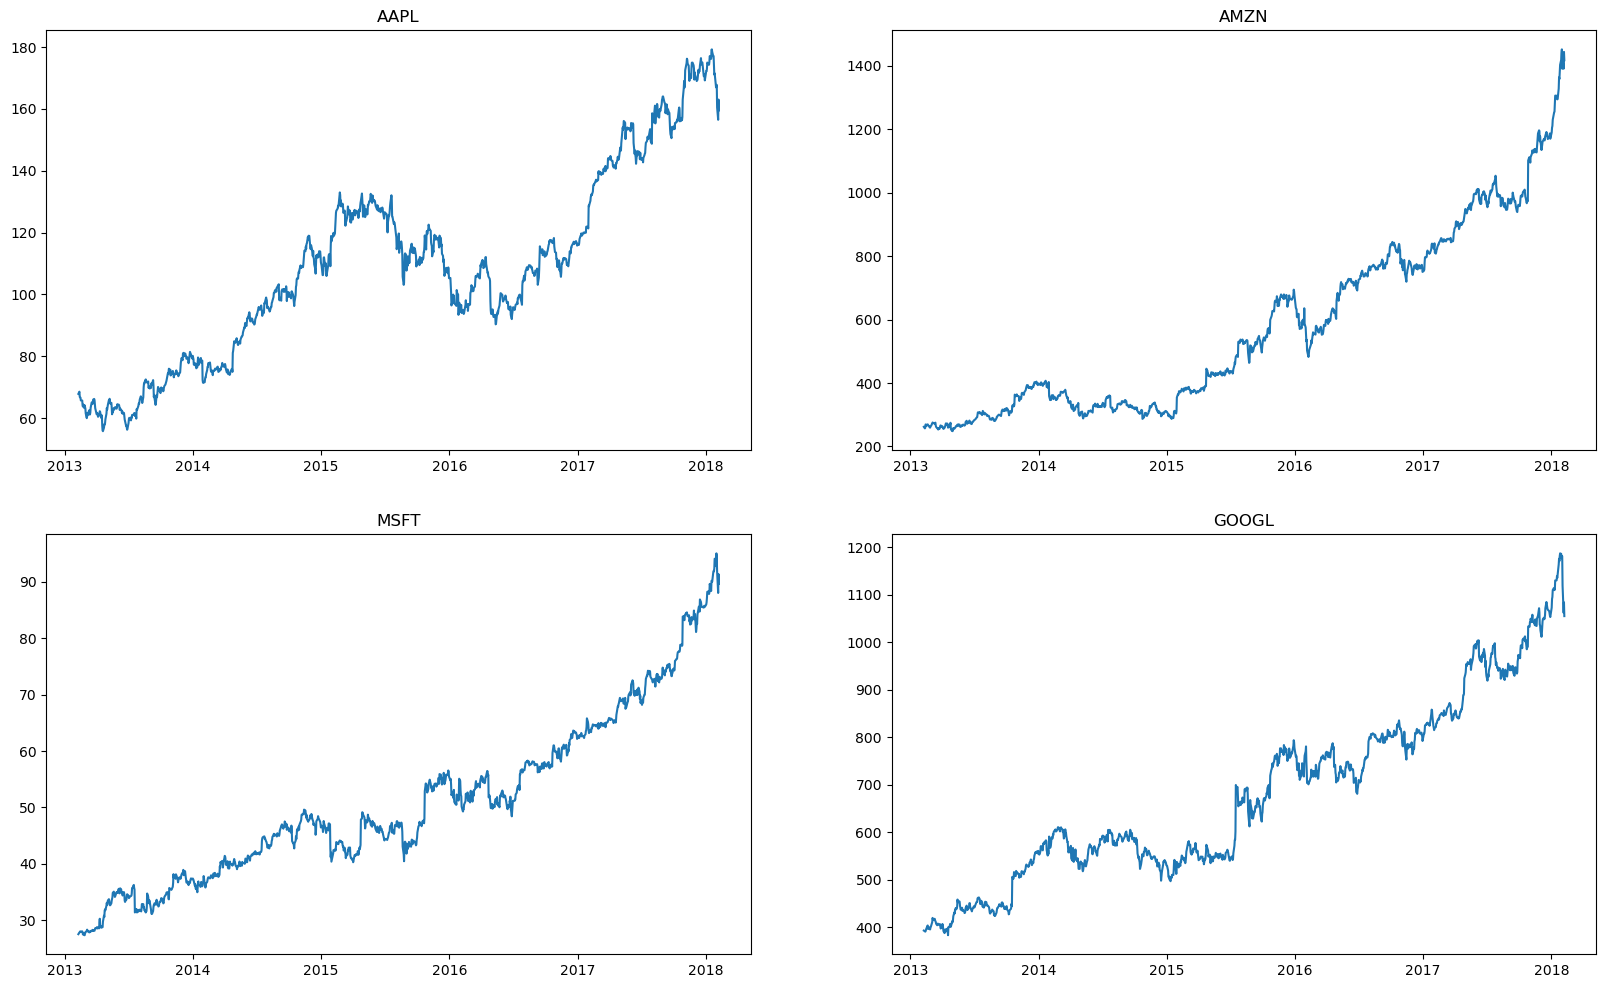

In [42]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    #define subplot for each company
    plt.subplot(2,2,index)
    #to plot closing price trend for company, we need df where all rows are for Microsoft only
    filter1=all_data['Name']==company
    df=all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

In [43]:
#moving average is a statistic which computes any change in data over a time interval
#used in stock analysis to remove noise in moving data

In [44]:
all_data.head(15)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
5  2013-02-15  66.9785  67.1656  65.7028  65.7371   97924631  AAPL
6  2013-02-19  65.8714  66.1042  64.8356  65.7128  108854046  AAPL
7  2013-02-20  65.3842  65.3842  64.1142  64.1214  118891367  AAPL
8  2013-02-21  63.7142  64.1671  63.2599  63.7228  111596821  AAPL
9  2013-02-22  64.1785  64.5142  63.7999  64.4014   82583823  AAPL
10 2013-02-25  64.8356  65.0171  63.2242  63.2571   92899597  AAPL
11 2013-02-26  63.4028  64.5056  62.5228  64.1385  125096657  AAPL
12 2013-02-27  64.0614  64.6342  62.9499  63.5099  146674682  AAPL
13 2013-02-28  63.4357  63.9814  63.0571  63.0571   80532382  AAPL
14 2013-03-01  62.5714  62.5971  61.4257  61.4957  137899041  AAPL

In [45]:
#let's say we have to compute moving average of data with window of 10 days
#it's like a sliding window problem
#more the window param=>more less noisy plot

In [47]:
all_data['close'].rolling(window=10).mean().head(14)
#for first 10 rows we get NaN value as we are going to compute its avg value using the rolling function

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [48]:
new_data=all_data.copy()

In [53]:
ma_day=[10,20,50]
for ma in ma_day:
    new_data['close_'+str(ma)]=new_data['close'].rolling(ma).mean()

In [60]:
new_data.head()

date     open     high      low    close     volume  Name  close_10  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       NaN   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       NaN   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL       NaN   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL       NaN   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       NaN   

   close_20  close_50  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN

In [55]:
new_data.tail()

date     open     high      low    close   volume   Name  close_10  \
5031 2018-02-01  1175.99  1187.45  1169.36  1181.59  3675709  GOOGL  1175.248   
5032 2018-02-02  1127.42  1131.30  1111.17  1119.20  5892122  GOOGL  1172.818   
5033 2018-02-05  1100.61  1114.99  1056.74  1062.39  4177469  GOOGL  1162.641   
5034 2018-02-06  1033.98  1087.38  1030.01  1084.43  3831524  GOOGL  1153.467   
5035 2018-02-07  1084.97  1086.53  1054.62  1055.41  2597094  GOOGL  1141.879   

      close_20   close_50  
5031  1147.207  1091.7894  
5032  1148.379  1093.4802  
5033  1145.984  1093.7220  
5034  1144.495  1094.3722  
5035  1141.626  1094.3500

In [61]:
#pandas plot for plotting
new_data.set_index('date',inplace=True)

In [63]:
new_data

open       high        low      close     volume   Name  \
date                                                                       
2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416   AAPL   
2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425   AAPL   
2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363   AAPL   
2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995   AAPL   
2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154   AAPL   
...               ...        ...        ...        ...        ...    ...   
2018-02-01  1175.9900  1187.4500  1169.3600  1181.5900    3675709  GOOGL   
2018-02-02  1127.4200  1131.3000  1111.1700  1119.2000    5892122  GOOGL   
2018-02-05  1100.6100  1114.9900  1056.7400  1062.3900    4177469  GOOGL   
2018-02-06  1033.9800  1087.3800  1030.0100  1084.4300    3831524  GOOGL   
2018-02-07  1084.9700  1086.5300  1054.6200  1055.4100    2597094  GOOGL   

            close_10  close_20   close_50  
date                                       
2013-02-08       NaN       NaN        NaN  
2013-02-11       NaN       NaN        NaN  
2013-02-12       NaN       NaN        NaN  
2013-02-13       NaN       NaN        NaN  
2013-02-14       NaN       NaN        NaN  
...              ...       ...        ...  
2018-02-01  1175.248  1147.207  1091.7894  
2018-02-02  1172.818  1148.379  1093.4802  
2018-02-05  1162.641  1145.984  1093.7220  
2018-02-06  1153.467  1144.495  1094.3722  
2018-02-07  1141.879  1141.626  1094.3500  

[5036 rows x 9 columns]

In [64]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

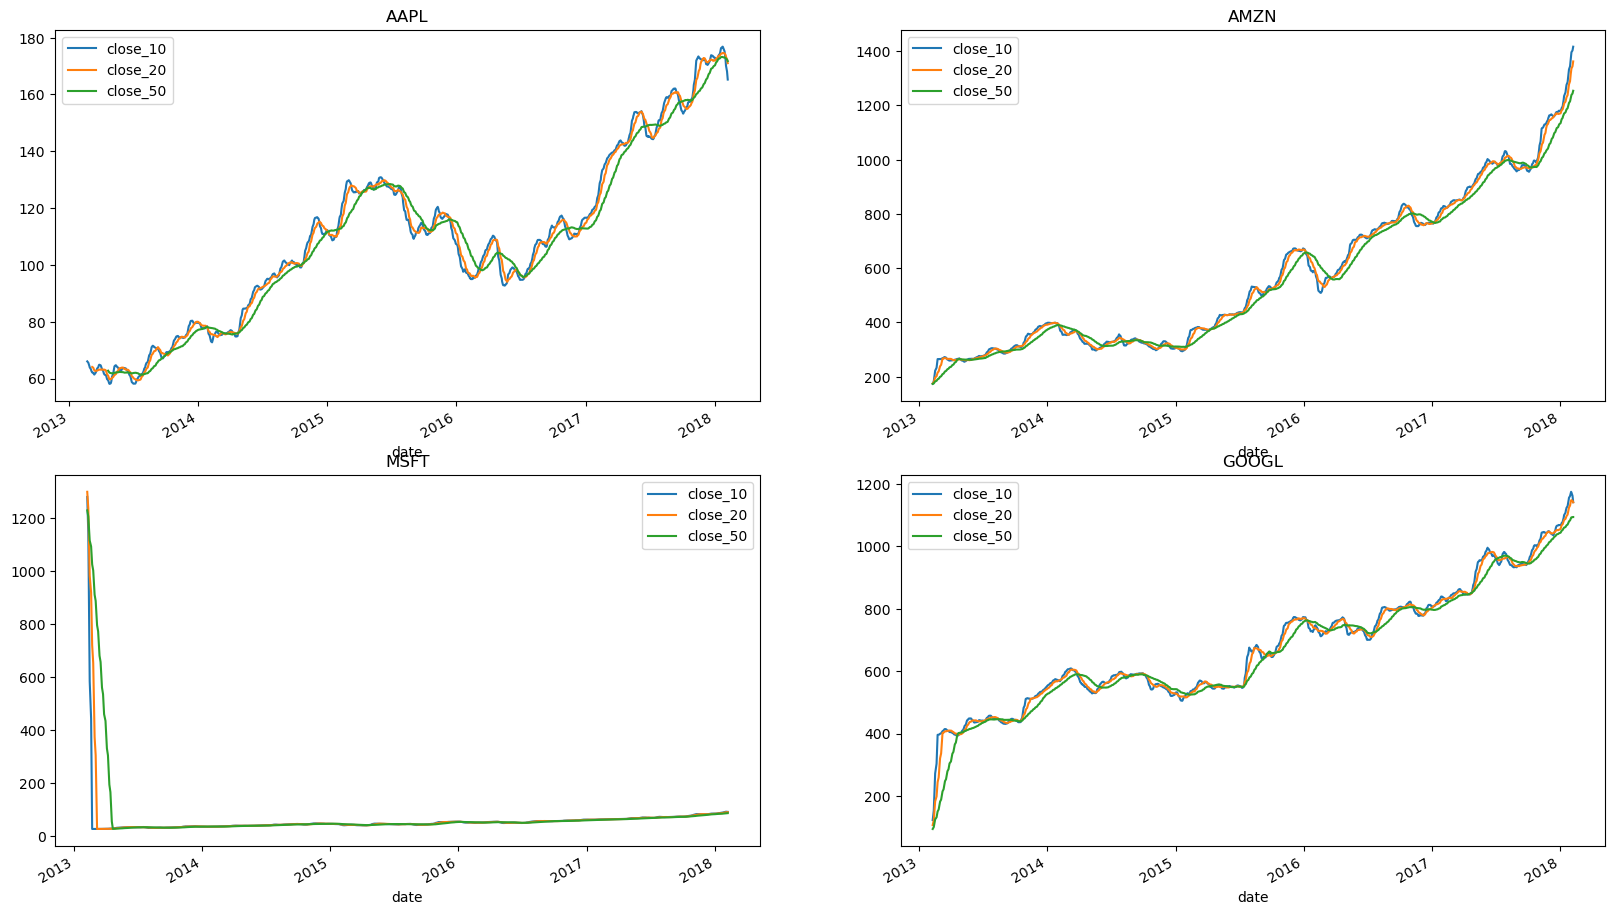

In [66]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

#Will print Moving average plot

In [67]:
#analyze the closing price change in apple stocks

In [68]:
company_list

['individual_stocks_5yr/AAPL_data.csv',
 'individual_stocks_5yr/AMZN_data.csv',
 'individual_stocks_5yr/MSFT_data.csv',
 'individual_stocks_5yr/GOOGL_data.csv']

In [76]:
import pandas as pd
import zipfile

zip_path = r'C:\Users\anupa\Downloads\S&P_resources.zip'
file_path_in_zip = 'individual_stocks_5yr/AAPL_data.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Open the specific file in the ZIP archive
    with z.open(file_path_in_zip) as f:
        # Read the CSV file into a DataFrame
        apple = pd.read_csv(f)

# Display the head of the DataFrame
print(apple.head())


         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL


In [79]:
apple.head(4)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL

In [83]:
apple['Daily return(in %)']=apple['close'].pct_change()*100 #percentage change in high and low

In [84]:
apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297  
4           -0.089934

In [85]:
import plotly.express as px

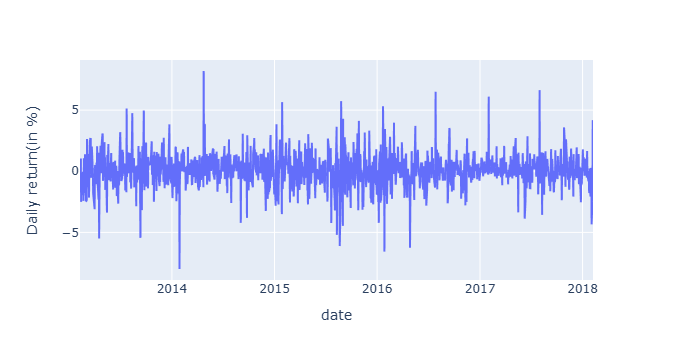

In [86]:
px.line(apple,x='date',y='Daily return(in %)')

In [88]:
#performing resampling analysis of closing price...
#day feature must be row index for resampling

In [89]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [90]:
apple['date']=pd.to_datetime(apple['date'])

In [91]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [92]:
apple.head(4)

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297

In [93]:
apple.set_index('date',inplace=True)

In [94]:
apple.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily return(in %)  
date                            
2013-02-08                 NaN  
2013-02-11            1.042235  
2013-02-12           -2.506658  
2013-02-13           -0.190297  
2013-02-14           -0.089934

In [98]:
apple['close'].resample('M').mean() #resampling per month

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

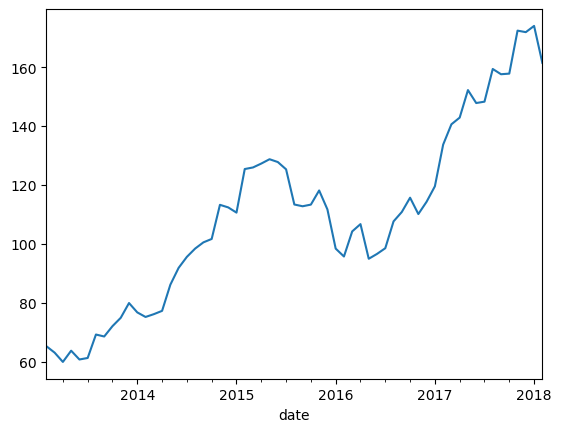

In [99]:
apple['close'].resample('M').mean().plot()

In [101]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

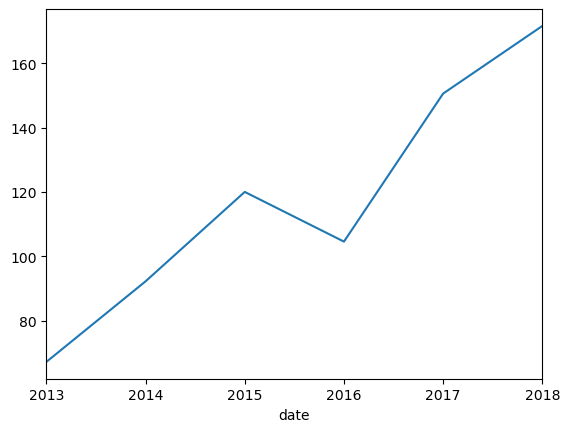

In [102]:
apple['close'].resample('Y').mean().plot()

In [103]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

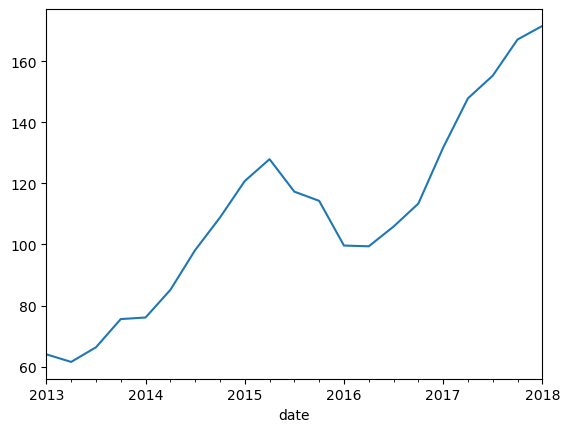

In [104]:
apple['close'].resample('Q').mean().plot()

In [105]:
#RESAMPLING IS USED TO OBSERVE TRENDS OR PATTERNS OVER DIFFERENT TIME INTERVALS, TO HELP ANALYSTS DERIVE INSIGHTS LIKE WEEKLY,MONTHLY AND DAILY TRENDS

In [106]:
#Performing multivariate analysis to understand co-relation

In [107]:
#check if the closing prices of these tech companies correlated or not? (Co-relation analysis)

In [108]:
#we can use scatter plot,regression plot etc

In [109]:
company_list

['individual_stocks_5yr/AAPL_data.csv',
 'individual_stocks_5yr/AMZN_data.csv',
 'individual_stocks_5yr/MSFT_data.csv',
 'individual_stocks_5yr/GOOGL_data.csv']

In [110]:
company_list[0]

'individual_stocks_5yr/AAPL_data.csv'

In [115]:
import pandas as pd
import zipfile

zip_path = r'C:\Users\anupa\Downloads\S&P_resources.zip'
file_path_in_zip = 'individual_stocks_5yr/AAPL_data.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Open the specific file in the ZIP archive
    with z.open(file_path_in_zip) as f:
        # Read the CSV file into a DataFrame
        apple = pd.read_csv(f)

# Display the head of the DataFrame
print(apple.head())

         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL


In [125]:
import pandas as pd
import zipfile

zip_path = r'C:\Users\anupa\Downloads\S&P_resources.zip'
file_path_in_zip = 'individual_stocks_5yr/AMZN_data.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Open the specific file in the ZIP archive
    with z.open(file_path_in_zip) as f:
        # Read the CSV file into a DataFrame
        amazon = pd.read_csv(f)

# Display the head of the DataFrame
print(amazon.head())

         date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN


In [126]:
import pandas as pd
import zipfile

zip_path = r'C:\Users\anupa\Downloads\S&P_resources.zip'
file_path_in_zip = 'individual_stocks_5yr/MSFT_data.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Open the specific file in the ZIP archive
    with z.open(file_path_in_zip) as f:
        # Read the CSV file into a DataFrame
        msoft = pd.read_csv(f)

# Display the head of the DataFrame
print(msoft.head())

         date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [127]:
import pandas as pd
import zipfile

zip_path = r'C:\Users\anupa\Downloads\S&P_resources.zip'
file_path_in_zip = 'individual_stocks_5yr/GOOGL_data.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Open the specific file in the ZIP archive
    with z.open(file_path_in_zip) as f:
        # Read the CSV file into a DataFrame
        google = pd.read_csv(f)

# Display the head of the DataFrame
print(google.head())

         date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1  2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2  2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3  2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4  2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL


In [121]:
#we opened all the csv files from the zip file

In [122]:
closing_price=pd.DataFrame()
clos

In [130]:
closing_price['apple_close']=apple['close']
closing_price['amazon_close']=amazon['close']
closing_price['google_close']=google['close']
closing_price['msoft_close']=msoft['close']

In [131]:
closing_price

apple_close  amazon_close  google_close  msoft_close
0     27.55     393.0777        261.95      393.0777        27.55
1     27.86     391.6012        257.21      391.6012        27.86
2     27.88     390.7403        258.70      390.7403        27.88
3     28.03     391.8214        269.47      391.8214        28.03
4     28.04     394.3039        269.24      394.3039        28.04
...     ...          ...           ...           ...          ...
1254  94.26    1181.5900       1390.00     1181.5900        94.26
1255  91.78    1119.2000       1429.95     1119.2000        91.78
1256  88.00    1062.3900       1390.00     1062.3900        88.00
1257  91.33    1084.4300       1442.84     1084.4300        91.33
1258  89.61    1055.4100       1416.78     1055.4100        89.61

[1259 rows x 5 columns]

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

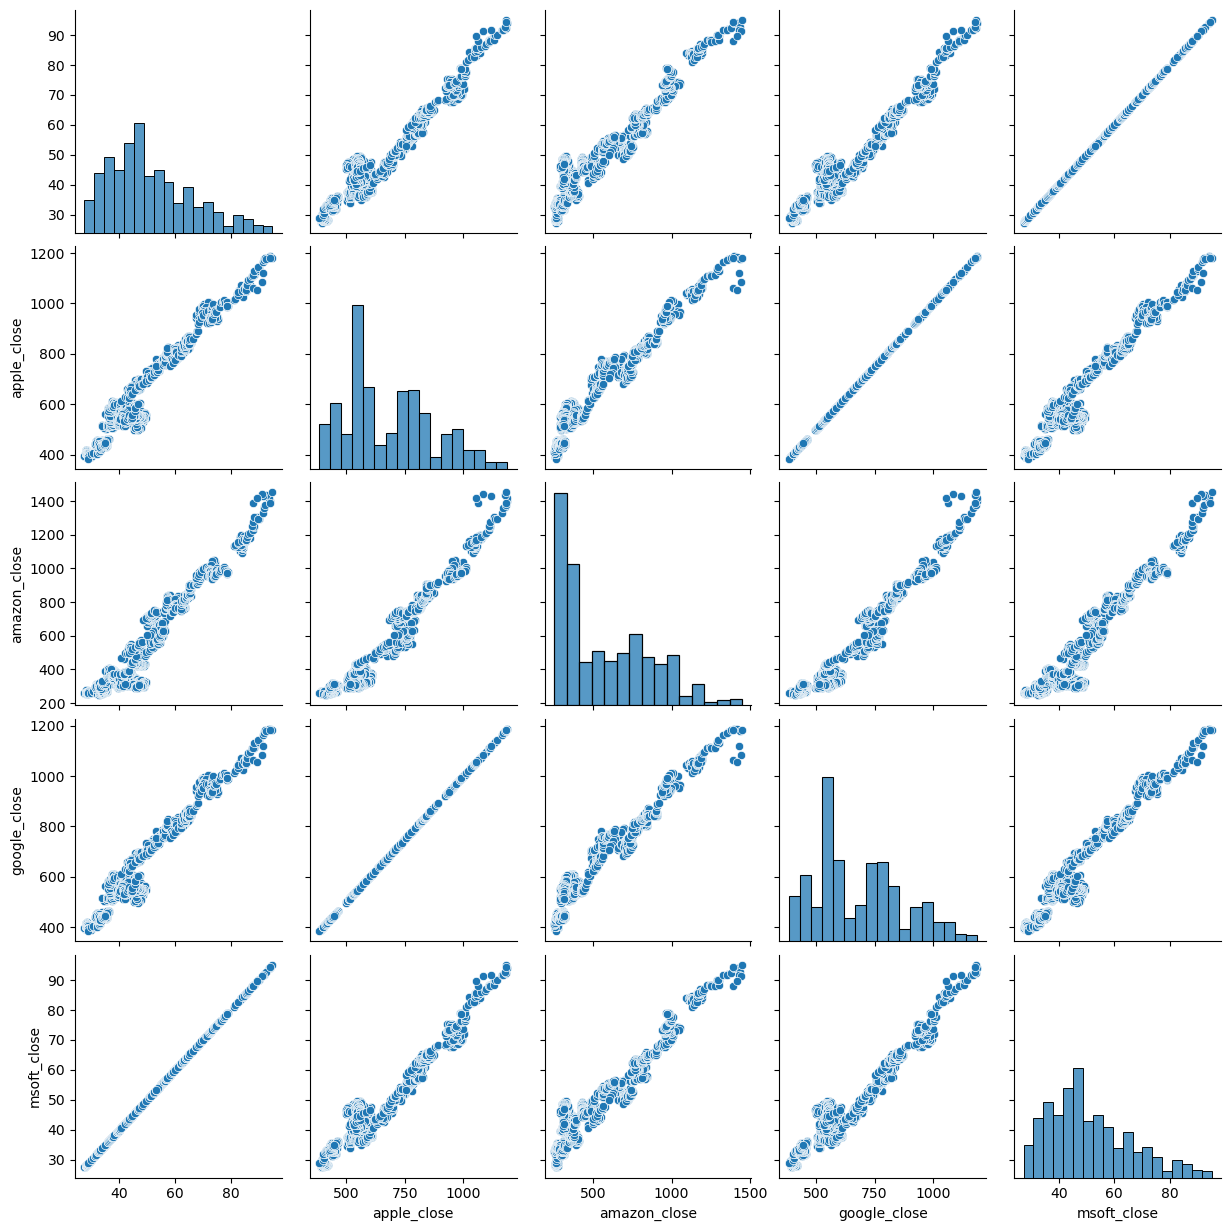

In [132]:
#now we prepared this df, now call the pairplot func
sns.pairplot(closing_price)

In [133]:
closing_price.corr()

apple_close  amazon_close  google_close  msoft_close
              1.000000     0.970779      0.955977      0.970779     1.000000
apple_close   0.970779     1.000000      0.973988      1.000000     0.970779
amazon_close  0.955977     0.973988      1.000000      0.973988     0.955977
google_close  0.970779     1.000000      0.973988      1.000000     0.970779
msoft_close   1.000000     0.970779      0.955977      0.970779     1.000000

<Axes: >

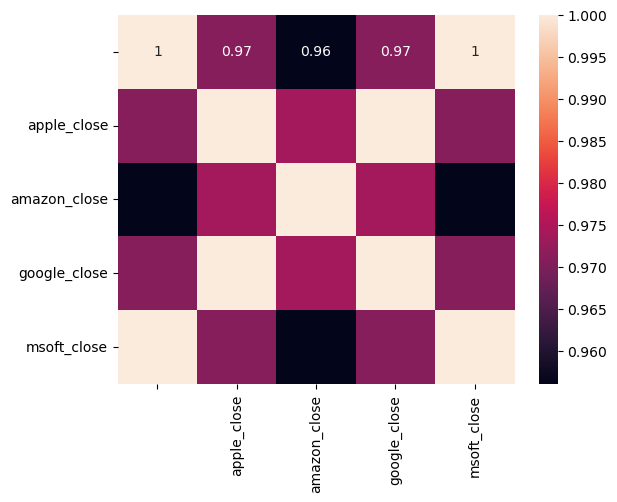

In [134]:
sns.heatmap(closing_price.corr(),annot=True)

In [135]:
#Check whether daily change in closing price of stocks or daily returns in stocks are co-related or not

In [136]:
#We have to perform a co-relation analysis (we will use a different plot) eg) pairgrid

In [137]:
closing_price

apple_close  amazon_close  google_close  msoft_close
0     27.55     393.0777        261.95      393.0777        27.55
1     27.86     391.6012        257.21      391.6012        27.86
2     27.88     390.7403        258.70      390.7403        27.88
3     28.03     391.8214        269.47      391.8214        28.03
4     28.04     394.3039        269.24      394.3039        28.04
...     ...          ...           ...           ...          ...
1254  94.26    1181.5900       1390.00     1181.5900        94.26
1255  91.78    1119.2000       1429.95     1119.2000        91.78
1256  88.00    1062.3900       1390.00     1062.3900        88.00
1257  91.33    1084.4300       1442.84     1084.4300        91.33
1258  89.61    1055.4100       1416.78     1055.4100        89.61

[1259 rows x 5 columns]

In [138]:
closing_price['apple_close']

0        393.0777
1        391.6012
2        390.7403
3        391.8214
4        394.3039
          ...    
1254    1181.5900
1255    1119.2000
1256    1062.3900
1257    1084.4300
1258    1055.4100
Name: apple_close, Length: 1259, dtype: float64

In [139]:
closing_price['apple_close'].shift(1)

0             NaN
1        393.0777
2        391.6012
3        390.7403
4        391.8214
          ...    
1254    1182.2200
1255    1181.5900
1256    1119.2000
1257    1062.3900
1258    1084.4300
Name: apple_close, Length: 1259, dtype: float64

In [145]:
((closing_price['apple_close']-closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1))*100

#we have to use same code for all the tech companies(use a loop)

0            NaN
1      -0.375625
2      -0.219841
3       0.276680
4       0.633579
          ...   
1254   -0.053290
1255   -5.280173
1256   -5.075947
1257    2.074568
1258   -2.676060
Name: apple_close, Length: 1259, dtype: float64

In [146]:
closing_price.columns

Index(['', 'apple_close', 'amazon_close', 'google_close', 'msoft_close'], dtype='object')

In [147]:
for col in closing_price.columns:
    closing_price[col+'_pct_change']=(closing_price[col]-closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [148]:
closing_price

apple_close  amazon_close  google_close  msoft_close  \
0     27.55     393.0777        261.95      393.0777        27.55   
1     27.86     391.6012        257.21      391.6012        27.86   
2     27.88     390.7403        258.70      390.7403        27.88   
3     28.03     391.8214        269.47      391.8214        28.03   
4     28.04     394.3039        269.24      394.3039        28.04   
...     ...          ...           ...           ...          ...   
1254  94.26    1181.5900       1390.00     1181.5900        94.26   
1255  91.78    1119.2000       1429.95     1119.2000        91.78   
1256  88.00    1062.3900       1390.00     1062.3900        88.00   
1257  91.33    1084.4300       1442.84     1084.4300        91.33   
1258  89.61    1055.4100       1416.78     1055.4100        89.61   

      _pct_change  apple_close_pct_change  amazon_close_pct_change  \
0             NaN                     NaN                      NaN   
1        1.125227               -0.375625                -1.809506   
2        0.071788               -0.219841                 0.579293   
3        0.538020                0.276680                 4.163123   
4        0.035676                0.633579                -0.085353   
...           ...                     ...                      ...   
1254    -0.789391               -0.053290                -4.196734   
1255    -2.631021               -5.280173                 2.874101   
1256    -4.118544               -5.075947                -2.793804   
1257     3.784091                2.074568                 3.801439   
1258    -1.883280               -2.676060                -1.806160   

      google_close_pct_change  msoft_close_pct_change  
0                         NaN                     NaN  
1                   -0.375625                1.125227  
2                   -0.219841                0.071788  
3                    0.276680                0.538020  
4                    0.633579                0.035676  
...                       ...                     ...  
1254                -0.053290               -0.789391  
1255                -5.280173               -2.631021  
1256                -5.075947               -4.118544  
1257                 2.074568                3.784091  
1258                -2.676060               -1.883280  

[1259 rows x 10 columns]

In [149]:
closing_price.columns

Index(['', 'apple_close', 'amazon_close', 'google_close', 'msoft_close',
       '_pct_change', 'apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'msoft_close_pct_change'],
      dtype='object')

In [150]:
closing_p=closing_price[['apple_close_pct_change','amazon_close_pct_change','google_close_pct_change','msoft_close_pct_change']]

In [151]:
closing_p

apple_close_pct_change  amazon_close_pct_change  \
0                        NaN                      NaN   
1                  -0.375625                -1.809506   
2                  -0.219841                 0.579293   
3                   0.276680                 4.163123   
4                   0.633579                -0.085353   
...                      ...                      ...   
1254               -0.053290                -4.196734   
1255               -5.280173                 2.874101   
1256               -5.075947                -2.793804   
1257                2.074568                 3.801439   
1258               -2.676060                -1.806160   

      google_close_pct_change  msoft_close_pct_change  
0                         NaN                     NaN  
1                   -0.375625                1.125227  
2                   -0.219841                0.071788  
3                    0.276680                0.538020  
4                    0.633579                0.035676  
...                       ...                     ...  
1254                -0.053290               -0.789391  
1255                -5.280173               -2.631021  
1256                -5.075947               -4.118544  
1257                 2.074568                3.784091  
1258                -2.676060               -1.883280  

[1259 rows x 4 columns]

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\anupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

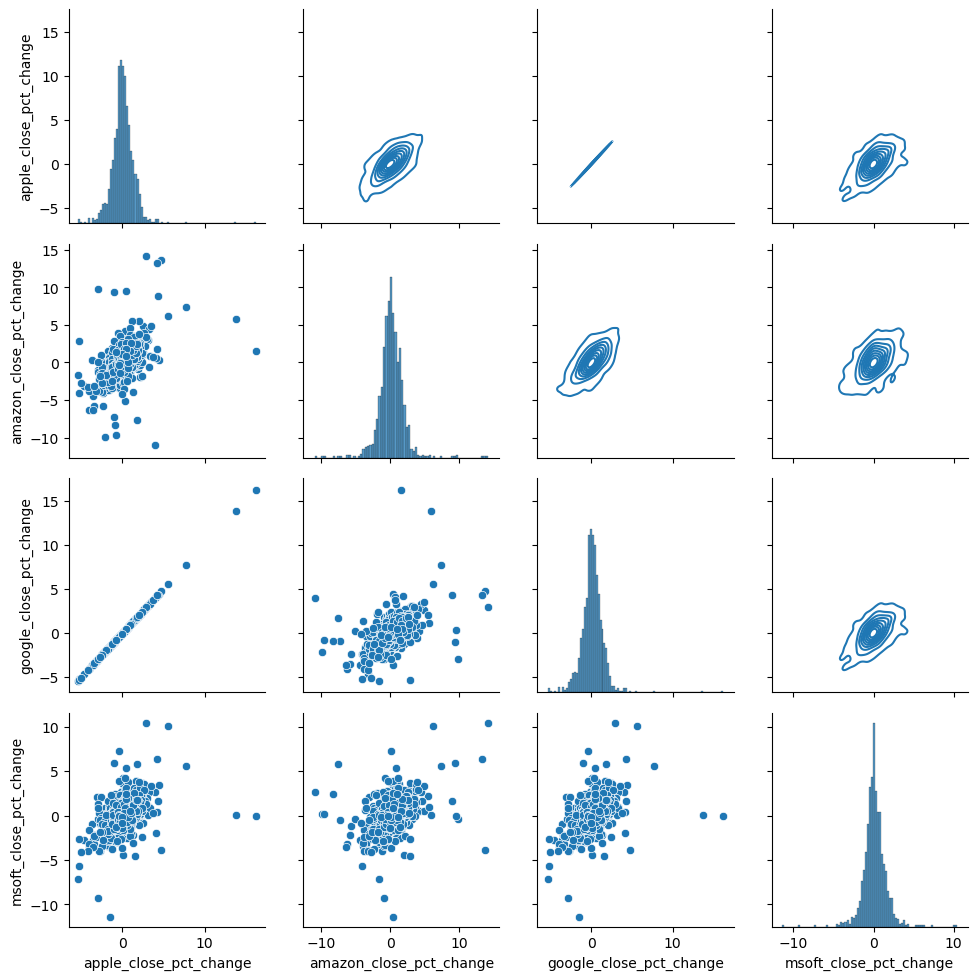

In [156]:
g=sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [157]:
closing_p.corr()

apple_close_pct_change  amazon_close_pct_change  \
apple_close_pct_change                 1.000000                 0.548423   
amazon_close_pct_change                0.548423                 1.000000   
google_close_pct_change                1.000000                 0.548423   
msoft_close_pct_change                 0.488373                 0.402678   

                         google_close_pct_change  msoft_close_pct_change  
apple_close_pct_change                  1.000000                0.488373  
amazon_close_pct_change                 0.548423                0.402678  
google_close_pct_change                 1.000000                0.488373  
msoft_close_pct_change                  0.488373                1.000000